<a href="https://colab.research.google.com/github/GuptaRitik/PlayStore-Review-EDA/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Play Store App Reviews EDA

### Started by Importing the required Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Data

df = pd.read_csv('/content/drive/MyDrive/DS_Almabetter /Python/Play Store Review Analysis – Ritik Gupta/Play Store Data.csv')

In [4]:
# Checking and reviewing the initials of the data
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# **Cleaning the DataFrame** 

*   Checking for outliers in important column with respect to analysis
*   Dropping the outliers (if any)
*   Taking care of Null Values
*   Converting values of columns for further operation

In [5]:
# using describe to check the min, 25%, 50%, 75%, max reviews
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In play store max rating is 5.0 and as we can see in the description, it shows a value beyond the max rating of 5.0, its called an outlier let's visualise it using a graph

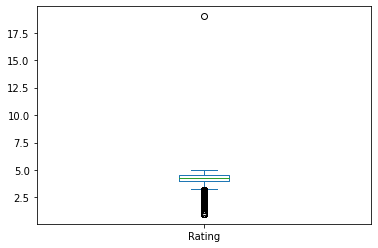

In [6]:
# using Boxplot to show the outliers in 'Rating' column
df['Rating'].plot(kind='box');

In [7]:
# Dropping the outlier because its data is inappropriate and not usefull for analysis
df.drop(df[df['Rating']>5.0].index, axis=0, inplace=True)

#new shape of Data frame after dropping outlier
df.shape

(10840, 13)

## Taking Care of Null values

In [8]:
# checking the number of null values presented in each column

df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

To get the max results from our analysis, we are filling null values of 'Rating' with median Ratings of its respective 'Category'.

In [9]:
# to fill with 'Category' median, we are using groupby and transform method

df["Rating"] = df.groupby("Category")['Rating'].transform(lambda x: x.fillna(x.median()))

Now filling null values of 'Type',  'Current Ver',  'Android Ver' columns with their modes respectively.

In [10]:
# filling mode of themselves in null values of columns using fillna method

df['Type'].fillna(df['Type'].mode()[0], inplace=True) # we used [0] because we are taking value at 0th index of the mode() output
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


as seen in info, Object is the Data Type of following column- 

*   Price
*   Review
*   Installs

we need to change it to their preferred type of integer and float

In [12]:
# for Price
# 1. removing the '$' sign in 'Price' column
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
# 2. converting the string type price to float type 
df['Price'] = df['Price'].apply(lambda x: float(x))


# for Review, we use pandas 'to neumeric' method cause it has large numbers
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')


# for Installs, 
# 1. we first replace unwanted characters from numeric string
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').str.replace('-','')
# 2. now we convert it to integer using apply method
df['Installs'] = df['Installs'].apply(lambda x: int(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


## Values of 'Size' column in data are of string format and in MB or KB so we are converting them to MB for optimum results.

In [13]:
df['Size']= df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x) #     Replacing 'M' from string of Size
df['Size']= df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size']= df['Size'].apply(lambda x: float(str(x).replace('k', ''))/1000 if 'k' in str(x) else x) #converting Kb of size to MB by dividing to 1000
df['Size']= df['Size'].apply(lambda x: float(x)) # converting all values to float

df['Size'].fillna(float(int(df['Size'].mean())), inplace=True) # filled nan values of size with the mean of size

In [14]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# **Now we cleared our data and its time to get summary of Data using visualisation tools**



## Calculating average rating 

In [15]:
# finding the most frequent rating given to apps
print(f"{df['Rating'].value_counts().nlargest(1).index[0]} is the most frequent rating given to {df['Rating'].value_counts().nlargest(1).values[0]} apps")

# Finding the average rating given to apps
print(f"the average rating in dataset is {round(df['Rating'].mean(),1)}")

4.3 is the most frequent rating given to 1979 apps
the average rating in dataset is 4.2


## Finding out the number/counts of Ratings given to apps 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


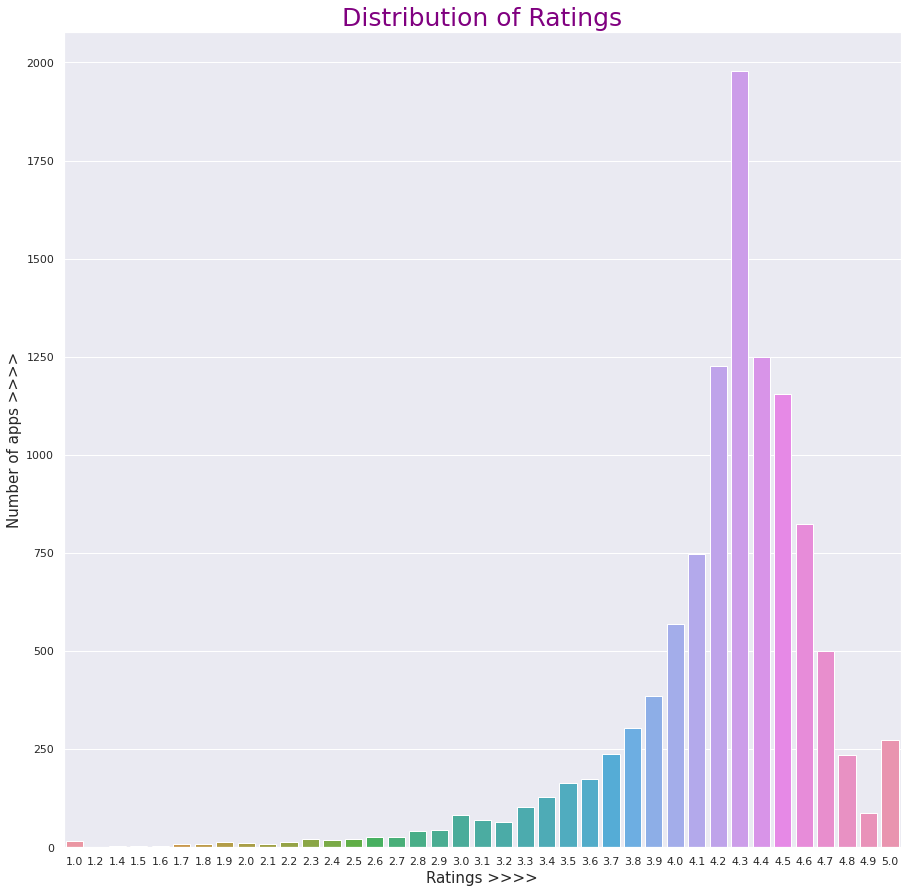

In [16]:
# plotting the graph of playstore rating distribution
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(df['Rating'])
plt.title('Distribution of Ratings', fontsize=25, color='purple')
plt.xlabel('Ratings >>>>', fontsize=15)
plt.ylabel('Number of apps >>>>', fontsize=15)
plt.show()

What we get from this:-

1. Ratings on play store are on positive side as most of ratings are between 4.0 and 4.5
2. Very few number of apps rated below 3.0

## Most of Apps belongs under which 'Content Rating' 

In [17]:
pd.DataFrame(df['Content Rating'].value_counts())

,Content Rating
Everyone,8714
Teen,1208
Mature 17+,499
Everyone 10+,414
Adults only 18+,3
Unrated,2


Almost 80% of apps belongs to content Rating of 'Everyone',
So, their Category matters the most in terms of analysis


## Category with the highest number of apps in playstore

Text(0, 0.5, 'No. of Apps')

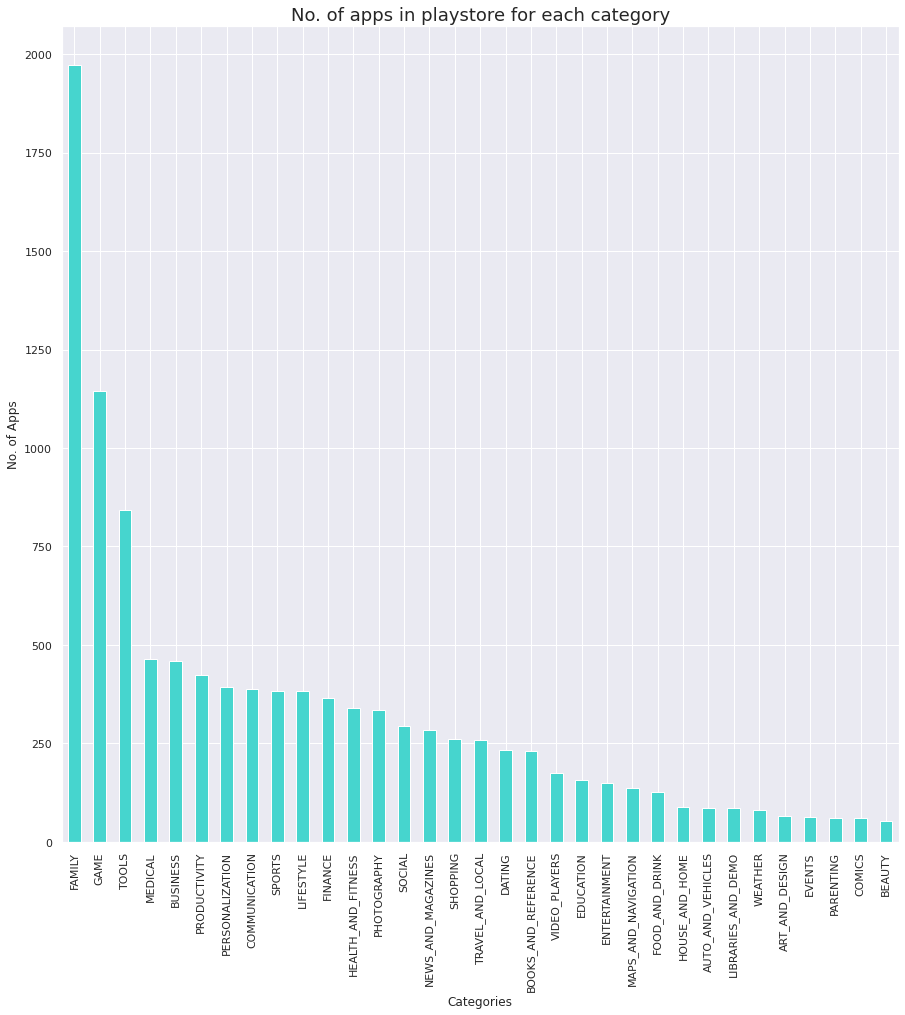

In [18]:
plt.figure(figsize=(15,15))
df['Category'].value_counts().plot.bar(color='#46d5ce');
plt.title('No. of apps in playstore for each category', fontsize=18)
plt.xlabel('Categories')
plt.ylabel('No. of Apps')

From the graph:-
1. Most of the apps belong to the category 'Family'
2. Top 3 categories are- 'Family', Game' & 'Tools'  for most of apps are developed
3. least number of apps are made for category 'Beauty'

## Top Categories with app installs of more than 1000000

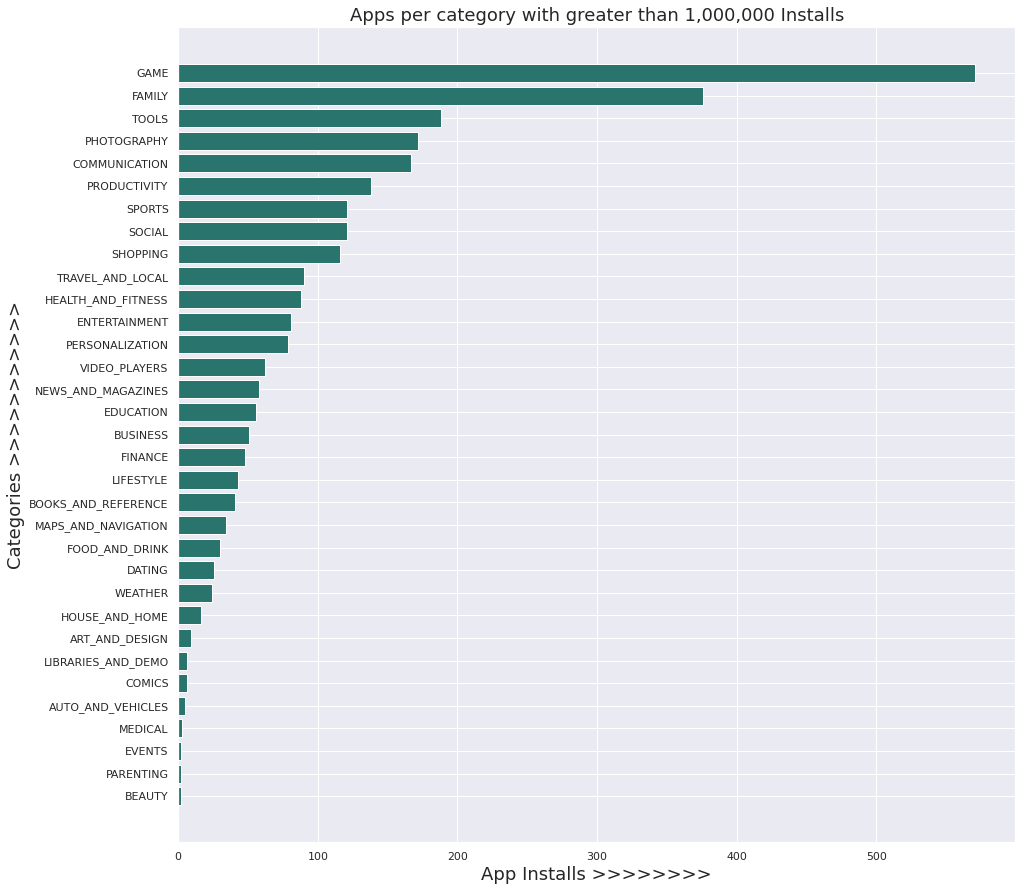

In [19]:
# creating a temporary dataframe to store app installs more than 1,000,000
temp_df = df[df['Installs']>1000000]

# calculating the counts of application in temporary dataframe
high_installs = temp_df['Category'].value_counts()
high_installs.sort_values(ascending=False)

#plot the presentation using matplotlib library
plt.figure(figsize=(15,15)) 
plt.xticks()
plt.barh(high_installs.index[::-1], high_installs.sort_values(ascending=True), color='#2a746e' ) #plotting bar graph horizontally
plt.title('Apps per category with greater than 1,000,000 Installs',fontsize=18)
plt.xlabel('App Installs >>>>>>>>',fontsize=18)
plt.ylabel('Categories >>>>>>>>>>>',fontsize=18)
plt.show()

Insights:-

* Games and Family are popular in terms of app installs
* Game and Family category has most number of apps with 1000000+ installs 

When comparing number of apps in playstore and highest installs of apps, we can see that 'Photography' is the catagory which has low number of apps but in installation it occurs in top 5 highest downloads

### Percentage of Free apps in DataFrame

In [20]:
# getting the percentage of FREE APPS from dataset
free_apps = round((df['Type'].value_counts()[0]/len(df))*100)
print(f"FREE APPS are {free_apps}% of the Data")

FREE APPS are 93% of the Data


## Average Ratings in each category

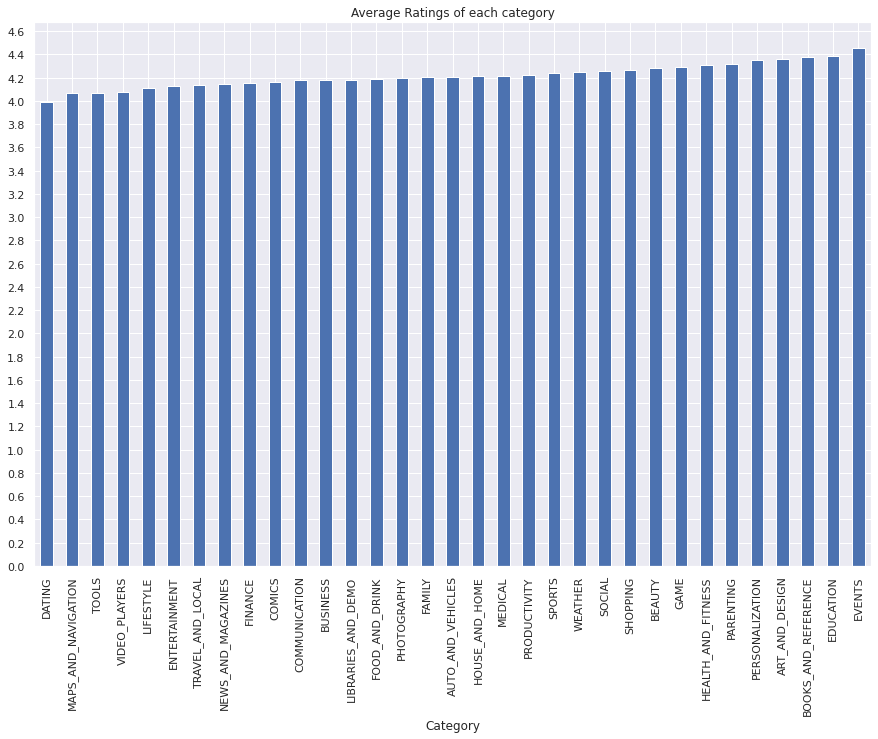

In [21]:
plt.figure(figsize=(15,10))
df.groupby('Category')['Rating'].mean().sort_values().plot.bar()
plt.yticks(np.arange(0, 4.8, 0.2))
plt.title('Average Ratings of each category')
plt.plot();

Insights:-
* Except for 'Dating', every category has average rating of above 4.0
* 'Beauty' has least apps but it is part of top 10 average rating

## Exploring a bit about apps of Beauty Category since its the least competitive category

<Figure size 1440x1800 with 0 Axes>

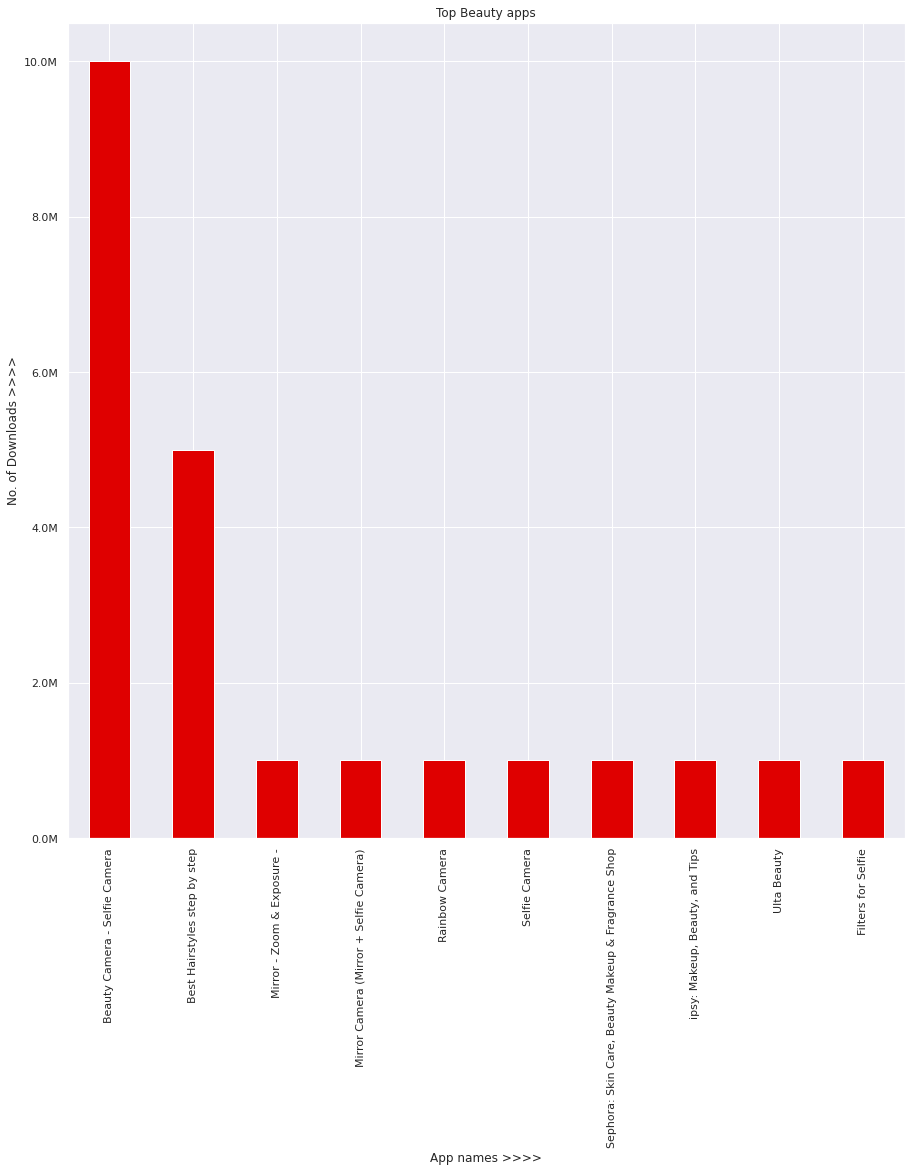

In [22]:
# slicing the data of top 10 beauty catagory apps, grouping with median installs
beauty_apps = df[df['Category']=="BEAUTY"].groupby('App')['Installs'].median().sort_values(ascending=False).head(10)

# creating function to convert numerical values into million on y-axis 
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

   
# plotting the graph
plt.figure(figsize=(20,25))

fig,ax = plt.subplots()
formatter = FuncFormatter(millions) 
ax.yaxis.set_major_formatter(formatter)

beauty_apps.plot.bar(color='#df0000')
plt.title('Top Beauty apps')
plt.xlabel('App names >>>>')
plt.ylabel('No. of Downloads >>>>')
plt.show()


Insights:-
* Beauty apps have 2 highest downloads apps
* 2 beauty apps crossed 5 million and 10 million downloads of its apps

This shows  a lot potentioal in beauty category as low competition and high ratings with high downloads of apps.

# Exploring Paid Apps -

## Getting No. of paid apps with installation greater than 100000 of each category

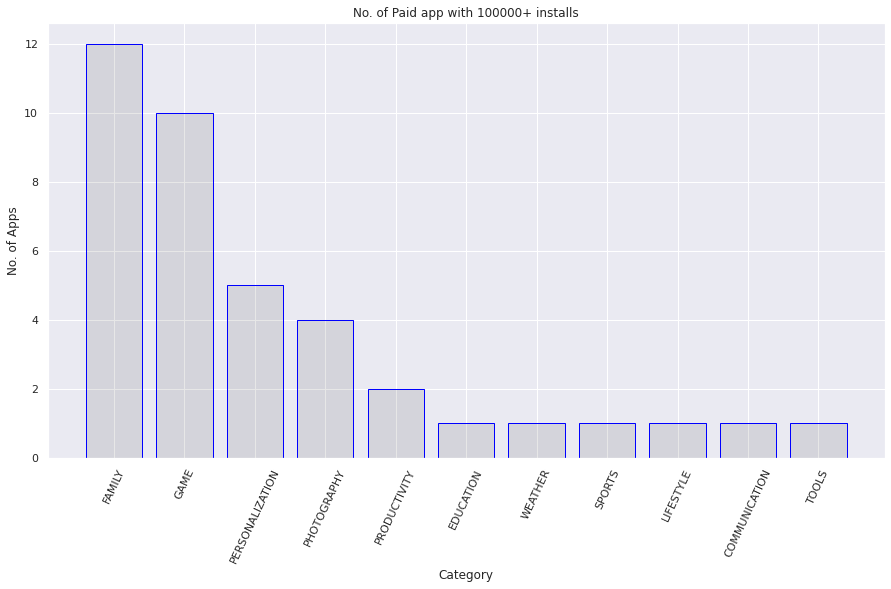

In [23]:
# putting paitd apps and installs of 100000+ in a variable
temp_df1 =  df[df['Type'] =='Paid'][df[df['Type']=='Paid']['Installs']>100000]

# getting number of apps in each category using value counts and converting it to DataFrame
paid_apps = pd.DataFrame(temp_df1['Category'].value_counts())

# plotting the bar graph
plt.figure(figsize=(15,8))
plt.xticks(rotation='65')
plt.bar(paid_apps.index, paid_apps['Category'],color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.title('No. of Paid app with 100000+ installs')
plt.xlabel('Category')
plt.ylabel('No. of Apps')
plt.show()

Insights:-
* Family and Game category have 12 and 10 paid apps respectively with 100000+ installs
* user are spending on Games more.

## Top 10 paid Apps with highest revenue

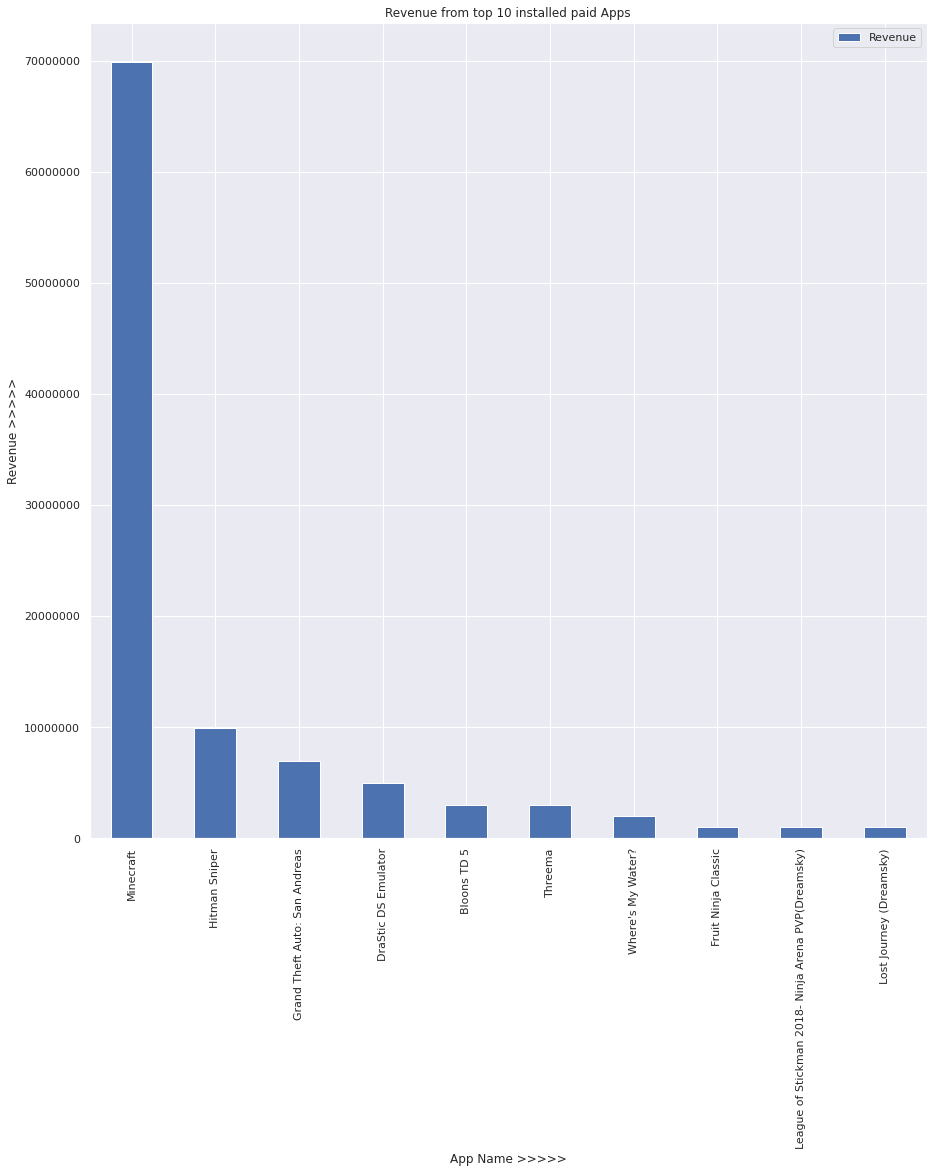

In [24]:
# creating temp. dataframe to store top 10 apps without duplicates and sorted it through high installs
temp_df1 = temp_df1.drop_duplicates(subset='App').sort_values('Installs', ascending=False).head(10)

# creating a revenue column in it (revenue is price * installs)
temp_df1['Revenue']= temp_df1['Price']*temp_df1['Installs']

# slice to only column which we need to evaluate
temp_df1= temp_df1.loc[:,['App','Revenue']]
temp_df1 = temp_df1.set_index('App')

# plotting the graph of top apps revenue from high to low
temp_df1.sort_values('Revenue', ascending=False).plot.bar()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title('Revenue from top 10 installed paid Apps')
plt.xlabel('App Name >>>>>')
plt.ylabel('Revenue >>>>>')
plt.show()

Insights-
* most revenue generated by a paid app is from category Game
* around 40% of revenue of paid apps is from games

## Top 10 Categories which have most number of Paid apps 

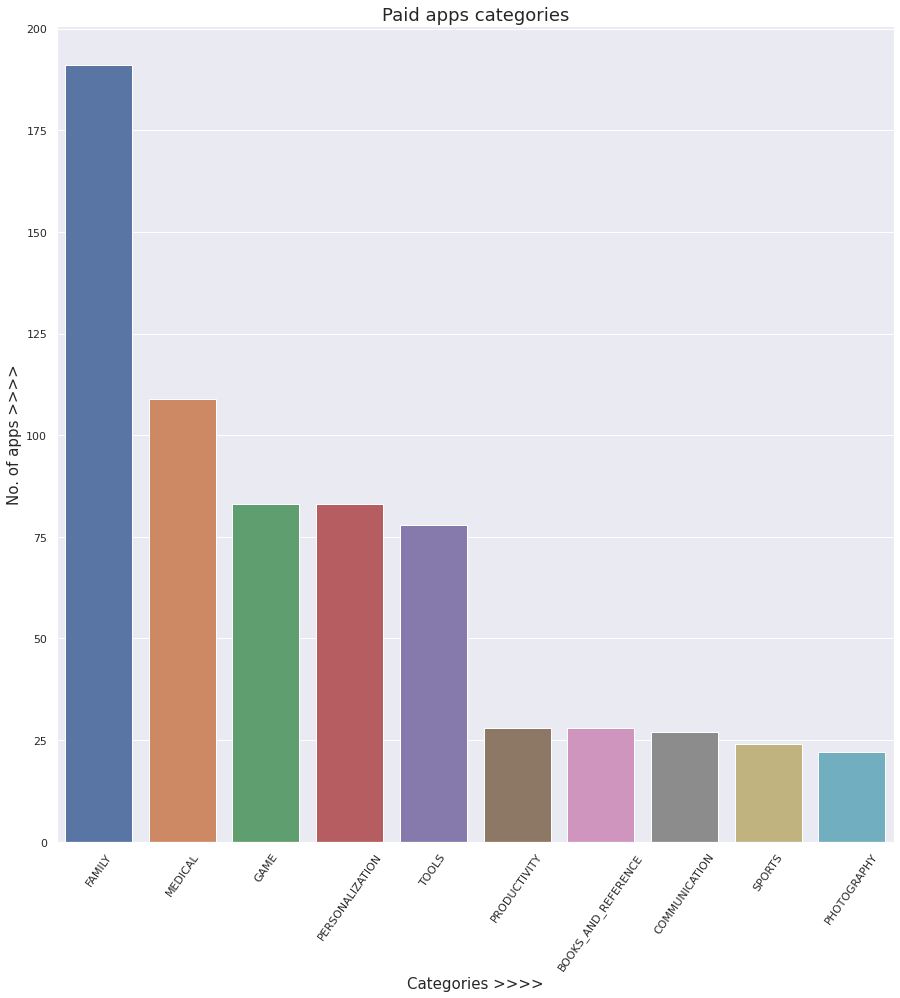

In [25]:
# slicing dataframe with top 10 paid app category and founding number of counts per category
paid_categories = df[df['Type']=='Paid']['Category'].value_counts().head(10)

#plotting the visual reprentation of top 10 categories having paid apps
plt.xticks(rotation=55)
plt.title('Paid apps categories', fontsize=18)
plt.xlabel('Categories >>>>',fontsize=15)
plt.ylabel('No. of apps >>>>',fontsize=15)
sns.barplot(x = paid_categories.index, y =paid_categories.values)

Insights:-

>
After analysaing the catagories, 3 category from top 5 categories, Medical, Games and Tools are of specific micro-niche, and we can conclude that paid apps are successful if it targets a niche market, they do not have high number of downloads because of niche market, users can pay if there's not many options available


Median Price of app:-

In [26]:
median_paid_app = df[df['Type']=='Paid']['Price'].median()
print(f'Median price for Paid apps is ${median_paid_app}')

Median price for Paid apps is $2.99


# Performing analysis on Size of Apps to find if it affects on user behaviour

## Visualising the average size of apps per category

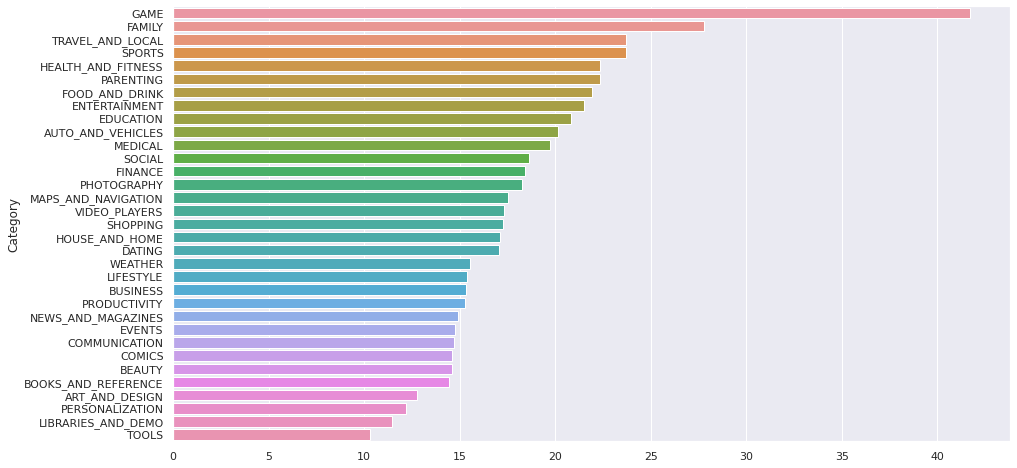

In [27]:
# using groupby method, finding out mean of size for each category and sorted it by high to low
plt.figure(figsize = (15,8))
sns.barplot(x= df.groupby('Category')['Size'].mean().sort_values(ascending=False).values, y= df.groupby('Category')['Size'].mean().sort_values(ascending=False).index)
plt.show()

Insights:-
* Gaming category has the higher size of apps
* Family category also has the second highest app sizes

## Analysing the relation between App size and Ratings

Text(336.9714285714286, 0.5, 'Ratings >>>>')

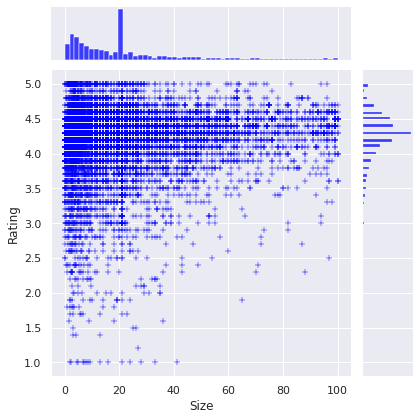

In [28]:
# plotting jointplot of Size and Rating
sns.set(rc={"figure.figsize":(10, 25)})
sns.jointplot(data=df.loc[:,['Size','Rating']], x="Size", y="Rating",color='blue', marker="+") #given data= dataframe of Rating and size

plt.xlabel('Size of apps >>>>')
plt.ylabel('Ratings >>>>')

Insights:


> The jointplot shows that, when the size are between 0-60, the ratings are mostly between 3.7 and 4.8, but when the size increse from 60, the number of rating drops, although rating is not too low even for apps with more size but eventually the percentage of rating drops for bulky apps.



## Analysing the impact of size on apps installation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


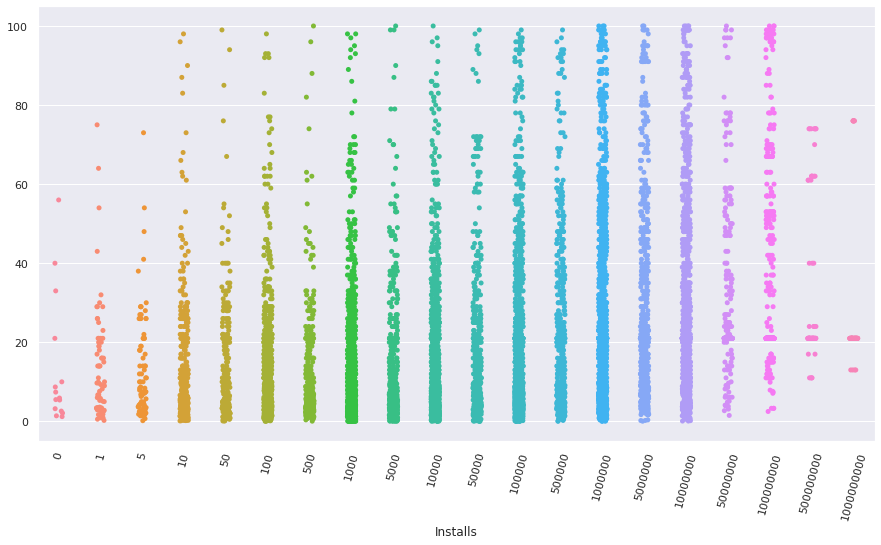

In [29]:
#
ttdf = df.loc[:,['Installs','Size']].set_index('Installs')

plt.figure(figsize = (15,8))
plt.xticks(rotation=75)
sns.stripplot(ttdf.index,ttdf['Size'].values)

Insights:-
> as we see, the installation are decreasing as going to above 60 MB of size, so we can conclude that size is a key factor for app installs, users installs became lower in case of high app size. 

